<a href="https://colab.research.google.com/github/Codenid/UTEC_2025_IA_FUNDAMENTALS/blob/main/TAREA/TAREA_2/Flow_Shop_Hill_Climbing_Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np

def generar_matriz_aleatoria(num_filas, num_columnas, tiempo_min=1, tiempo_max=10):
    """
    Genera una matriz de tiempos de procesamiento aleatoria.

    Parámetros:
    - num_filas: número de trabajos (filas).
    - num_columnas: número de máquinas (columnas).
    - tiempo_min: valor mínimo del tiempo de procesamiento.
    - tiempo_max: valor máximo del tiempo de procesamiento.

    Retorna:
    - Matriz de tiempos de procesamiento aleatoria.
    """
    matriz_tiempos = np.random.randint(tiempo_min, tiempo_max + 1, size=(num_filas, num_columnas))
    return matriz_tiempos

# Ejemplo de uso
num_jobs = 3
num_machines = 3
#matriz = generar_matriz_aleatoria(num_jobs, num_machines)
#print("Matriz de tiempos de procesamiento aleatoria:")
#print(matriz)


In [94]:
# Paso 1
import numpy as np
import matplotlib.pyplot as plt

# Jobs (i-filas) vs Maquina (j-columnas) = Tiempo Procesamiento (ij)
#tiempos_procesamiento = [
#    [2, 3, 4, 2, 4],
#    [1, 2, 2, 3, 3],
#    [4, 3, 1, 5, 2],
#    [3, 2, 1, 4, 5],
#]

tiempos_procesamiento = generar_matriz_aleatoria(num_jobs, num_machines)
print(tiempos_procesamiento)
# Step 1
#current_solution = np.array([0, 1, 2, 3])
current_solution = np.arange(len(tiempos_procesamiento))
np.random.shuffle(current_solution)
#current_solution = [0,1,2]
print(current_solution)

[[2 5 7]
 [6 2 4]
 [7 8 6]]
[2 0 1]


In [58]:
# Paso 2
def times_for_fitness(sol):
  # La primera fila nos da la cantidad de maquinas
  num_maquinas = len(tiempos_procesamiento[0])
  # Número de trabajos
  num_trabajos = len(sol)
  # Matríz para almancenar los tiempos de cama ejecución
  matriz_tiempos = np.zeros((num_trabajos, num_maquinas), dtype=int)

  for i, trabajo in enumerate(sol):
      for j in range(num_maquinas):
          if i == 0 and j == 0:
              matriz_tiempos[i][j] = tiempos_procesamiento[trabajo][j]
          elif i == 0:
              matriz_tiempos[i][j] = matriz_tiempos[i][j-1] + tiempos_procesamiento[trabajo][j]
          elif j == 0:
              matriz_tiempos[i][j] = matriz_tiempos[i-1][j] + tiempos_procesamiento[trabajo][j]
          else:
              matriz_tiempos[i][j] = max(matriz_tiempos[i-1][j], matriz_tiempos[i][j-1]) + tiempos_procesamiento[trabajo][j]
  return matriz_tiempos

def fitness(sol):
  tiempo_total_finalizacion = times_for_fitness(sol)[-1][-1]
  return tiempo_total_finalizacion

print( fitness(current_solution) )

19


In [52]:
# Paso 3
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

print( (current_solution) )
print( get_neighbors(current_solution) )

[1 2 0]
[array([2, 1, 0]), array([0, 2, 1]), array([1, 0, 2])]


In [95]:
# Paso 4
def hill_climbing(current_solution):

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    #print("neighbors", neighbors)
    #print("best_neighbor", best_neighbor)
    #print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing(current_solution)

#print("\n'good' solution:", solution)
#print("'good' fitness:", fitness(solution))

Iteration...
current_solution [2 0 1]
fitness current_solution 32

Iteration...
current_solution [0 2 1]
fitness current_solution 27


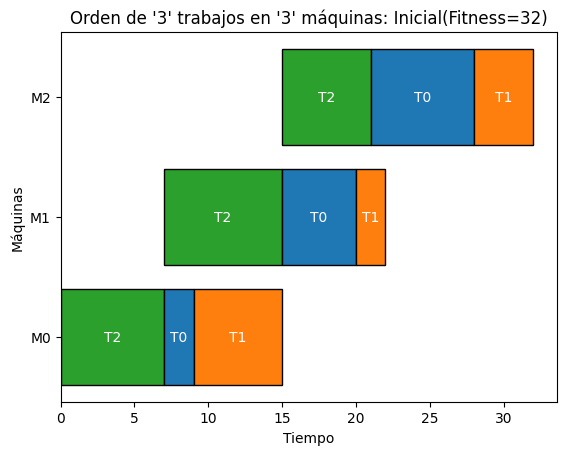

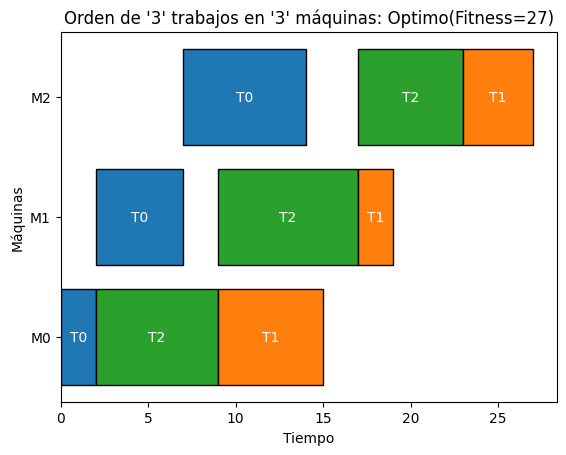

In [96]:
# Paso 5
# Función para graficar el orden de tareas en las máquinas
def plot_schedule(sol, fitness, tipo):
    matriz_tiempos = times_for_fitness(sol)
    num_maquinas = len(tiempos_procesamiento[0])
    num_trabajos = len(sol)

    fig, ax = plt.subplots()

    for i, trabajo in enumerate(sol):
        for j in range(num_maquinas):
            inicio = matriz_tiempos[i][j] - tiempos_procesamiento[trabajo][j]
            duracion = tiempos_procesamiento[trabajo][j]
            ax.barh(j, duracion, left=inicio, color=f"C{trabajo}", edgecolor="black")
            ax.text(inicio + duracion / 2, j, f"T{trabajo}", va="center", ha="center", color="white")

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Máquinas")
    ax.set_title(f"Orden de '{num_trabajos}' trabajos en '{num_maquinas}' máquinas: {tipo}(Fitness={fitness})")
    ax.set_yticks(range(num_maquinas))
    ax.set_yticklabels([f"M{j}" for j in range(num_maquinas)])

    plt.show()

plot_schedule(current_solution, fitness(current_solution), "Inicial")
plot_schedule(solution, fitness(solution), "Optimo")

Matriz de tiempos de procesamiento:
Trabajo 0: [4, 4, 4]
Trabajo 1: [1, 2, 3]
Trabajo 2: [4, 3, 2]

Solución inicial: [0, 2, 1]
Makespan inicial: 17

Mejor secuencia de trabajos: [0, 2, 1]
Makespan óptimo: 17


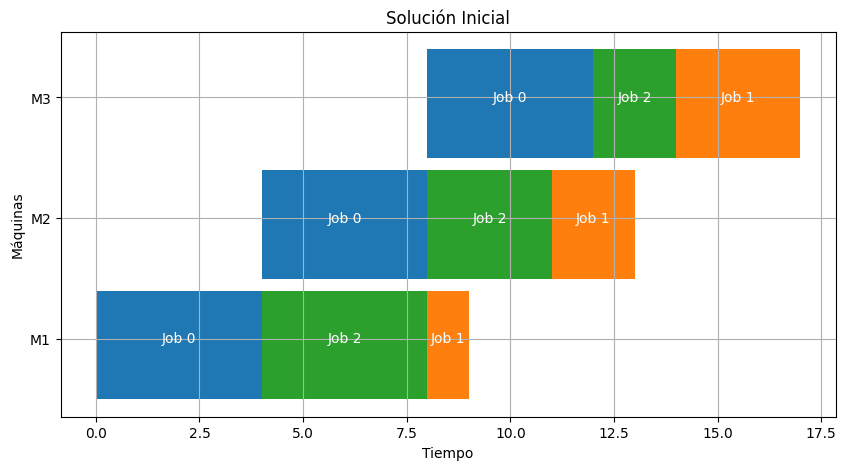

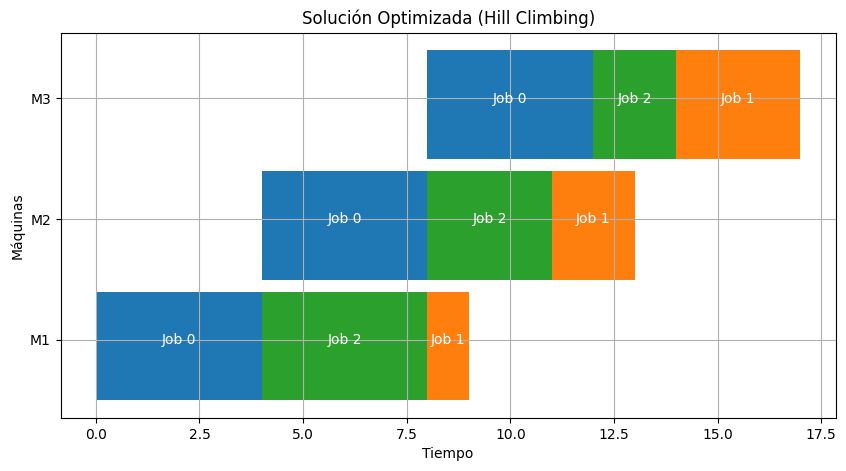

In [97]:
import random
import matplotlib.pyplot as plt

def generar_tiempos_procesamiento(num_trabajos, num_maquinas, min_tiempo=1, max_tiempo=5):
    """Genera una matriz de tiempos de procesamiento aleatorios."""
    return [[random.randint(min_tiempo, max_tiempo) for _ in range(num_maquinas)] for _ in range(num_trabajos)]

def calcular_makespan(secuencia, tiempos):
    num_maquinas = len(tiempos[0])
    num_trabajos = len(secuencia)

    completado = [[0] * num_maquinas for _ in range(num_trabajos)]

    for i, trabajo in enumerate(secuencia):
        for j in range(num_maquinas):
            if i == 0 and j == 0:
                completado[i][j] = tiempos[trabajo][j]
            elif i == 0:
                completado[i][j] = completado[i][j-1] + tiempos[trabajo][j]
            elif j == 0:
                completado[i][j] = completado[i-1][j] + tiempos[trabajo][j]
            else:
                completado[i][j] = max(completado[i-1][j], completado[i][j-1]) + tiempos[trabajo][j]

    return completado, completado[-1][-1]

def generar_solucion_inicial(num_trabajos):
    return random.sample(range(num_trabajos), num_trabajos)

def obtener_vecinos(secuencia):
    vecinos = []
    for i in range(len(secuencia) - 1):
        nueva_secuencia = secuencia[:]
        nueva_secuencia[i], nueva_secuencia[i+1] = nueva_secuencia[i+1], nueva_secuencia[i]
        vecinos.append(nueva_secuencia)
    return vecinos

def hill_climbing(tiempos):
    num_trabajos = len(tiempos)

    # Solución inicial
    solucion_inicial = generar_solucion_inicial(num_trabajos)
    completado_inicial, makespan_inicial = calcular_makespan(solucion_inicial, tiempos)

    print("\nSolución inicial:", solucion_inicial)
    print("Makespan inicial:", makespan_inicial)

    mejor_solucion = solucion_inicial
    mejor_makespan = makespan_inicial

    while True:
        vecinos = obtener_vecinos(mejor_solucion)
        mejora = False

        for vecino in vecinos:
            makespan_vecino = calcular_makespan(vecino, tiempos)[1]
            if makespan_vecino < mejor_makespan:
                mejor_solucion, mejor_makespan = vecino, makespan_vecino
                mejora = True

        if not mejora:
            break

    completado_final, makespan_final = calcular_makespan(mejor_solucion, tiempos)

    return solucion_inicial, makespan_inicial, completado_inicial, mejor_solucion, makespan_final, completado_final

def graficar_job_flow(secuencia, tiempos, completado, titulo):
    num_trabajos = len(secuencia)
    num_maquinas = len(tiempos[0])

    fig, ax = plt.subplots(figsize=(10, 5))

    colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    for i, trabajo in enumerate(secuencia):
        for j in range(num_maquinas):
            inicio = completado[i][j] - tiempos[trabajo][j]
            duracion = tiempos[trabajo][j]
            ax.broken_barh([(inicio, duracion)], (j * 10, 9), facecolors=colores[trabajo % len(colores)])
            ax.text(inicio + duracion / 2, j * 10 + 5, f'Job {trabajo}', ha='center', va='center', fontsize=10, color='white')

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Máquinas")
    ax.set_yticks([i * 10 + 5 for i in range(num_maquinas)])
    ax.set_yticklabels([f'M{i+1}' for i in range(num_maquinas)])
    ax.set_title(titulo)
    plt.grid(True)
    plt.show()

# Parámetros del problema
num_trabajos = 3  # Número de trabajos
num_maquinas = 3  # Número de máquinas

# Generar tiempos de procesamiento dinámicamente
tiempos_procesamiento = generar_tiempos_procesamiento(num_trabajos, num_maquinas)

print("Matriz de tiempos de procesamiento:")
for i, tiempos in enumerate(tiempos_procesamiento):
    print(f"Trabajo {i}: {tiempos}")

# Ejecutar Hill Climbing
(solucion_inicial, makespan_inicial, completado_inicial,
 solucion_optima, makespan_optimo, completado_final) = hill_climbing(tiempos_procesamiento)

print("\nMejor secuencia de trabajos:", solucion_optima)
print("Makespan óptimo:", makespan_optimo)

# Graficar la solución inicial y la optimizada
graficar_job_flow(solucion_inicial, tiempos_procesamiento, completado_inicial, "Solución Inicial")
graficar_job_flow(solucion_optima, tiempos_procesamiento, completado_final, "Solución Optimizada (Hill Climbing)")


In [4]:
import random

def calcular_makespan(secuencia, tiempos):
    num_maquinas = len(tiempos[0])
    num_trabajos = len(secuencia)

    # Matriz para almacenar tiempos de finalización
    completado = [[0] * num_maquinas for _ in range(num_trabajos)]

    for i, trabajo in enumerate(secuencia):
        for j in range(num_maquinas):
            if i == 0 and j == 0:
                completado[i][j] = tiempos[trabajo][j]
            elif i == 0:
                completado[i][j] = completado[i][j-1] + tiempos[trabajo][j]
            elif j == 0:
                completado[i][j] = completado[i-1][j] + tiempos[trabajo][j]
            else:
                completado[i][j] = max(completado[i-1][j], completado[i][j-1]) + tiempos[trabajo][j]

    return completado[-1][-1]

def generar_solucion_inicial(num_trabajos):
    return random.sample(range(num_trabajos), num_trabajos)

def obtener_vecinos(secuencia):
    vecinos = []
    for i in range(len(secuencia) - 1):
        nueva_secuencia = secuencia[:]
        nueva_secuencia[i], nueva_secuencia[i+1] = nueva_secuencia[i+1], nueva_secuencia[i]
        vecinos.append(nueva_secuencia)
    return vecinos

def hill_climbing(tiempos):
    num_trabajos = len(tiempos)
    mejor_solucion = generar_solucion_inicial(num_trabajos)
    print(f"Solución inicial: {mejor_solucion}")
    mejor_makespan = calcular_makespan(mejor_solucion, tiempos)
    print(f"Makespan inicial: {mejor_makespan}")

    while True:
        vecinos = obtener_vecinos(mejor_solucion)
        mejora = False

        print(f"Solución vecino: {vecinos}")
        for vecino in vecinos:
            makespan_vecino = calcular_makespan(vecino, tiempos)
            print(f"Makespan vecino: {makespan_vecino}")
            if makespan_vecino < mejor_makespan:
                mejor_solucion, mejor_makespan = vecino, makespan_vecino
                mejora = True

        if not mejora:
            break

    return mejor_solucion, mejor_makespan

# Datos de ejemplo: tiempos de procesamiento en cada máquina para cada trabajo
tiempos_procesamiento = [
    [3, 2, 2],
    [4, 3, 1],
    [2, 1, 3]
]

solucion_optima, makespan_optimo = hill_climbing(tiempos_procesamiento)
print("Mejor secuencia:", solucion_optima)
print("Makespan óptimo:", makespan_optimo)


Solución inicial: [0, 1, 3, 2]
Makespan inicial: 18
Solución vecino: [[1, 0, 3, 2], [0, 3, 1, 2], [0, 1, 2, 3]]
Makespan vecino: 18
Makespan vecino: 17
Makespan vecino: 17
Solución vecino: [[3, 0, 1, 2], [0, 1, 3, 2], [0, 3, 2, 1]]
Makespan vecino: 17
Makespan vecino: 18
Makespan vecino: 16
Solución vecino: [[3, 0, 2, 1], [0, 2, 3, 1], [0, 3, 1, 2]]
Makespan vecino: 16
Makespan vecino: 16
Makespan vecino: 17
Mejor secuencia: [0, 3, 2, 1]
Makespan óptimo: 16


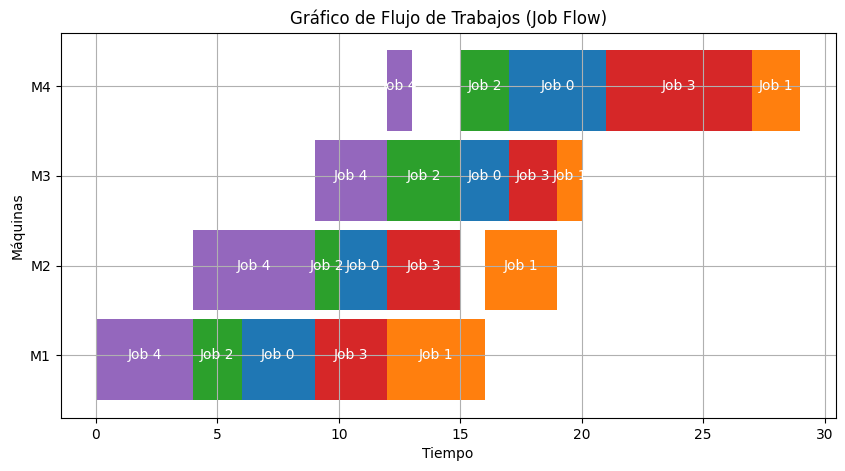

Solución inicial: [4, 2, 0, 3, 1]
Makespan inicial: 29
Mejor secuencia: [2, 0, 3, 4, 1]
Makespan óptimo: 23


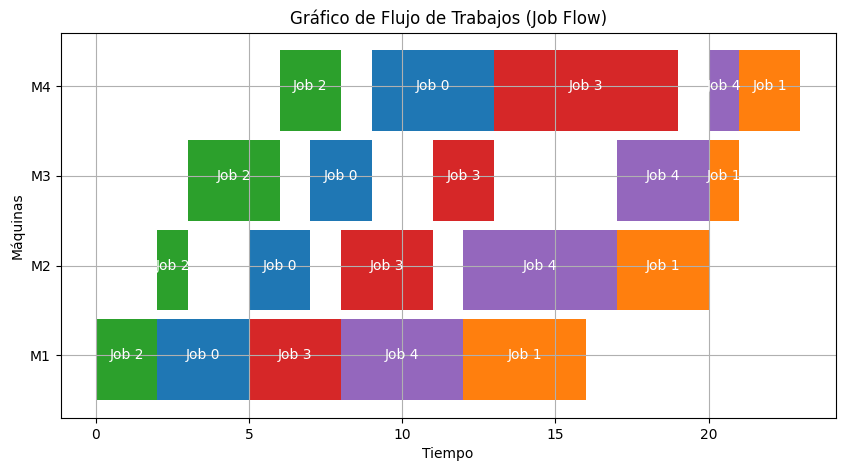

In [1]:
import random
import matplotlib.pyplot as plt

def calcular_makespan(secuencia, tiempos):
    num_maquinas = len(tiempos[0])
    num_trabajos = len(secuencia)

    completado = [[0] * num_maquinas for _ in range(num_trabajos)]

    for i, trabajo in enumerate(secuencia):
        for j in range(num_maquinas):
            if i == 0 and j == 0:
                completado[i][j] = tiempos[trabajo][j]
            elif i == 0:
                completado[i][j] = completado[i][j-1] + tiempos[trabajo][j]
            elif j == 0:
                completado[i][j] = completado[i-1][j] + tiempos[trabajo][j]
            else:
                completado[i][j] = max(completado[i-1][j], completado[i][j-1]) + tiempos[trabajo][j]

    return completado, completado[-1][-1]

def generar_solucion_inicial(num_trabajos):
    return random.sample(range(num_trabajos), num_trabajos)

def obtener_vecinos(secuencia):
    vecinos = []
    for i in range(len(secuencia) - 1):
        nueva_secuencia = secuencia[:]
        nueva_secuencia[i], nueva_secuencia[i+1] = nueva_secuencia[i+1], nueva_secuencia[i]
        vecinos.append(nueva_secuencia)
    return vecinos


def hill_climbing(tiempos):
    num_trabajos = len(tiempos)
    mejor_solucion = generar_solucion_inicial(num_trabajos)
    mejor_makespan = calcular_makespan(mejor_solucion, tiempos)[1]

    # Grafico inicial
    graficar_job_flow(mejor_solucion, tiempos, calcular_makespan(mejor_solucion, tiempos)[0])
    print(f"Solución inicial: {mejor_solucion}")
    print(f"Makespan inicial: {mejor_makespan}")

    while True:
        vecinos = obtener_vecinos(mejor_solucion)
        mejora = False
        #print(f"Solución vecino: {vecinos}")

        for vecino in vecinos:
            makespan_vecino = calcular_makespan(vecino, tiempos)[1]
            if makespan_vecino < mejor_makespan:
                mejor_solucion, mejor_makespan = vecino, makespan_vecino
                mejora = True

        if not mejora:
            break

    return mejor_solucion, mejor_makespan, calcular_makespan(mejor_solucion, tiempos)[0]

def graficar_job_flow(secuencia, tiempos, completado):
    num_trabajos = len(secuencia)
    num_maquinas = len(tiempos[0])

    fig, ax = plt.subplots(figsize=(10, 5))

    colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    for i, trabajo in enumerate(secuencia):
        for j in range(num_maquinas):
            inicio = completado[i][j] - tiempos[trabajo][j]
            duracion = tiempos[trabajo][j]
            ax.broken_barh([(inicio, duracion)], (j * 10, 9), facecolors=colores[trabajo % len(colores)])
            ax.text(inicio + duracion / 2, j * 10 + 5, f'Job {trabajo}', ha='center', va='center', fontsize=10, color='white')

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Máquinas")
    ax.set_yticks([i * 10 + 5 for i in range(num_maquinas)])
    ax.set_yticklabels([f'M{i+1}' for i in range(num_maquinas)])
    ax.set_title("Gráfico de Flujo de Trabajos (Job Flow)")
    plt.grid(True)
    plt.show()

# Datos de ejemplo
tiempos_procesamiento = [
    [3, 2, 2, 4],
    [4, 3, 1, 2],
    [2, 1, 3, 2],
    [3, 3, 2, 6],
    [4, 5, 3, 1]
]

solucion_optima, makespan_optimo, completado = hill_climbing(tiempos_procesamiento)

print("Mejor secuencia:", solucion_optima)
print("Makespan óptimo:", makespan_optimo)

# Generar el gráfico
graficar_job_flow(solucion_optima, tiempos_procesamiento, completado)
